In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az
from sklearn.ensemble import RandomForestRegressor
import joblib
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [5]:
data = pd.read_excel('combined_data.xlsx')
data

,Campaign,Campaign state,Campaign type,Week,Clicks,Impr.,CTR,Currency code,Avg. CPC,Cost,Impr. (Abs. Top) %,Conversions,Cost / conv.,Conv. rate,Budget
0,All Courses,Enabled,Search,2022-10-17,360,2881,0.1250,GBP,1.29,464.06,0.4665,1.0,464.06,0.0028,65
1,All Courses,Enabled,Search,2022-10-24,485,3174,0.1528,GBP,0.94,457.97,0.4458,11.0,41.63,0.0227,65
2,All Courses,Enabled,Search,2022-10-31,500,4120,0.1214,GBP,0.92,460.76,0.4250,4.0,115.19,0.0080,65
3,All Courses,Enabled,Search,2022-11-07,508,3962,0.1282,GBP,0.95,481.64,0.4036,13.0,37.05,0.0256,65
4,All Courses,Enabled,Search,2022-11-14,413,2802,0.1474,GBP,1.04,431.26,0.3876,3.0,143.75,0.0073,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,All Courses,NaN,NaN,2024-04-29,478,8749,0.0546,GBP,1.23,587.63,NaN,34.3,17.13,0.0718,50
165,All Courses,NaN,NaN,2024-05-06,495,9939,0.0498,GBP,1.41,697.04,NaN,12.0,58.09,0.0242,100
166,All Courses,NaN,NaN,2024-05-13,452,8400,0.0538,GBP,1.34,607.62,NaN,18.0,33.76,0.0398,100
167,All Courses,NaN,NaN,2024-05-20,875,188180,0.0046,GBP,0.49,424.66,NaN,15.0,28.31,0.0171,100


In [6]:
df = data.copy()
# Create 'Ad_ID' based on 'Campaign state'
df['Ad_ID'] = df['Campaign state'].apply(lambda x: 1 if x == 'Enabled' else 2)

# Sort the dataframe
df.sort_values(by=['Ad_ID', 'Week'], inplace=True)


# Dropping rows with NaN values due to shift operation
df.dropna(inplace=True)

# Extracting date-based features
df['Month'] = df['Week'].dt.month


# Selecting features and target variable
features = [ 'Budget', 'Month']
X = df[features]
y = df['Clicks']

# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine learning



In [7]:
X_train

,Budget,Month
76,60,4
42,60,8
49,60,9
11,49,1
30,60,5
...,...,...
20,57,3
60,60,12
71,60,2
14,57,1


##Linear regression

In [8]:
# Define the model
lr_model = LinearRegression()

# Fit the model on the training data
lr_model.fit(X_train, y_train)

# Predict on the test data
predictions = lr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R^2: {r2}')


MSE: 7156.59099018178, MAE: 69.4959499741243, RMSE: 84.59663699096897, R^2: 0.42907116348511476


##Random forest

In [9]:
# Import necessary library
from sklearn.ensemble import RandomForestRegressor

# Define the model
rf_model = RandomForestRegressor()
# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Predict on the test data
predictions = rf_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f'MSE: {mse}, MAE: {mae}, RMSE: {rmse}, R^2: {r2}')

MSE: 2744.433766722057, MAE: 41.98792670401493, RMSE: 52.3873435738257, R^2: 0.7810582748858492


Gradient Boosting

In [10]:
from sklearn.ensemble import GradientBoostingRegressor


gb_model_clicks = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_model_clicks.fit(X_train, y_train)
predictions_clicks = gb_model_clicks.predict(X_test)

mse_clicks = mean_squared_error(y_test, predictions_clicks)
mae_clicks = mean_absolute_error(y_test, predictions_clicks)
rmse_clicks = np.sqrt(mse_clicks)
r2_clicks = r2_score(y_test, predictions_clicks)

print(f'MSE: {mse_clicks}, MAE: {mae_clicks}, RMSE: {rmse_clicks}, R^2: {r2_clicks}')


MSE: 2688.5672918549476, MAE: 41.366037895879465, RMSE: 51.85139623823979, R^2: 0.7855151149567468


Hierarchical Bayesian model

In [11]:
import cmdstanpy
cmdstanpy.install_cmdstan()


CmdStan install directory: /root/.cmdstan
Installing CmdStan version: 2.35.0
Download successful, file: /tmp/tmparc0r00t
Extracting distribution


DEBUG:cmdstanpy:cmd: make build -j1
cwd: None


Unpacked download as cmdstan-2.35.0
Building version cmdstan-2.35.0, may take several minutes, depending on your system.


DEBUG:cmdstanpy:cmd: make examples/bernoulli/bernoulli
cwd: None


Installed cmdstan-2.35.0
Test model compilation


True

In [12]:
import pandas as pd
import numpy as np
from cmdstanpy import CmdStanModel
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Add a small random noise to the budget to avoid identical values
df['Budget'] = df['Budget'] + np.random.normal(0, 0.1, len(df))

# Standardize the budget variable for better convergence
budget_mean = df['Budget'].mean()
budget_std = df['Budget'].std()
df['Budget_standardized'] = (df['Budget'] - budget_mean) / budget_std

# Prepare the data dictionary for Stan
data = {
    'N': len(df),
    'Budget': df['Budget_standardized'].values,
    'Clicks': df['Clicks'].values,
    'N_new': 7,
    'new_Budget': (np.array([50, 75, 100, 125, 150, 175, 200]) - budget_mean) / budget_std
}

# Define and write the Stan model
stan_code = """
data {
  int<lower=0> N;
  vector[N] Budget;
  vector[N] Clicks;
  int<lower=0> N_new;
  vector[N_new] new_Budget;
}
parameters {
  real alpha;
  real beta;
  real<lower=0> sigma;
}
model {
  Clicks ~ normal(alpha + beta * Budget, sigma);
}
generated quantities {
  vector[N_new] predicted_Clicks;
  for (i in 1:N_new) {
    predicted_Clicks[i] = normal_rng(alpha + beta * new_Budget[i], sigma);
  }
  vector[N] y_pred;
  for (i in 1:N) {
    y_pred[i] = normal_rng(alpha + beta * Budget[i], sigma);
  }
}
"""

# Write the Stan model code to a file
with open('model.stan', 'w') as f:
    f.write(stan_code)

# Compile the model
model = CmdStanModel(stan_file='model.stan')

# Fit the model
fit = model.sample(data=data)

# Summarize the results
print(fit.summary())

# Extract the samples
samples = fit.draws_pd()

# Extract y_pred samples
y_pred_samples = samples.filter(like='y_pred')

# Calculate the mean of y_pred samples for each data point
y_pred_means = y_pred_samples.mean(axis=0)

# Calculate R², MAE, and MSE
r2 = r2_score(df['Clicks'], y_pred_means)
mae = mean_absolute_error(df['Clicks'], y_pred_means)
mse = mean_squared_error(df['Clicks'], y_pred_means)

print(f'R²: {r2}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')


21:04:31 - cmdstanpy - INFO - compiling stan file /content/model.stan to exe file /content/model
INFO:cmdstanpy:compiling stan file /content/model.stan to exe file /content/model
DEBUG:cmdstanpy:cmd: make STANCFLAGS+=--filename-in-msg=model.stan /content/model
cwd: /root/.cmdstan/cmdstan-2.35.0
DEBUG:cmdstanpy:Console output:

--- Translating Stan model to C++ code ---
bin/stanc --filename-in-msg=model.stan --o=/content/model.hpp /content/model.stan

--- Compiling C++ code ---
g++ -std=c++17 -pthread -D_REENTRANT -Wno-sign-compare -Wno-ignored-attributes -Wno-class-memaccess      -I stan/lib/stan_math/lib/tbb_2020.3/include    -O3 -I src -I stan/src -I stan/lib/rapidjson_1.1.0/ -I lib/CLI11-1.9.1/ -I stan/lib/stan_math/ -I stan/lib/stan_math/lib/eigen_3.4.0 -I stan/lib/stan_math/lib/boost_1.84.0 -I stan/lib/stan_math/lib/sundials_6.1.1/include -I stan/lib/stan_math/lib/sundials_6.1.1/src/sundials    -DBOOST_DISABLE_ASSERTS          -c -Wno-ignored-attributes   -x c++ -o /content/model.

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:idx 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/model', 'id=2', 'random', 'seed=84383', 'data', 'file=/tmp/tmpznnzbxcu/k6lc7hje.json', 'output', 'file=/tmp/tmpznnzbxcu/model8p81kp_n/model-20240717210445_2.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:CmdStan args: ['/content/model', 'id=1', 'random', 'seed=84383', 'data', 'file=/tmp/tmpznnzbxcu/k6lc7hje.json', 'output', 'file=/tmp/tmpznnzbxcu/model8p81kp_n/model-20240717210445_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmdstanpy:idx 2
DEBUG:cmdstanpy:running CmdStan, num_threads: 1
DEBUG:cmdstanpy:CmdStan args: ['/content/model', 'id=3', 'random', 'seed=84383', 'data', 'file=/tmp/tmpznnzbxcu/k6lc7hje.json', 'output', 'file=/tmp/tmpznnzbxcu/model8p81kp_n/model-20240717210445_3.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
DEBUG:cmds

21:04:46 - cmdstanpy - INFO - CmdStan done processing.
INFO:cmdstanpy:CmdStan done processing.
DEBUG:cmdstanpy:runset
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['/content/model', 'id=1', 'random', 'seed=84383', 'data', 'file=/tmp/tmpznnzbxcu/k6lc7hje.json', 'output', 'file=/tmp/tmpznnzbxcu/model8p81kp_n/model-20240717210445_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[0, 0, 0, 0]
 per-chain output files (showing chain 1 only):
 csv_file:
	/tmp/tmpznnzbxcu/model8p81kp_n/model-20240717210445_1.csv
 console_msgs (if any):
	/tmp/tmpznnzbxcu/model8p81kp_n/model-20240717210445_0-stdout.txt
DEBUG:cmdstanpy:Chain 1 console:
method = sample (Default)
  sample
    num_samples = 1000 (Default)
    num_warmup = 1000 (Default)
    save_warmup = false (Default)
    thin = 1 (Default)
    adapt
      engaged = true (Default)
      gamma = 0.05 (Default)
      delta = 0.8 (Default)
      kappa = 0.75 (Default)
      t0 = 10 (Default)
     


                         Mean      MCSE    StdDev        5%       50%  \
lp__                -415.7250  0.028612   1.26347 -418.2310 -415.3910   
alpha                462.2140  0.165210  10.15230  445.5220  462.0970   
beta                  50.9286  0.170587  10.15290   34.3973   50.8484   
sigma                 91.0686  0.124439   7.32491   79.5450   90.6156   
predicted_Clicks[1]  321.8460  1.535940  97.39840  164.1610  322.9450   
...                       ...       ...       ...       ...       ...   
y_pred[80]           469.1420  1.470800  92.52350  319.3960  469.9860   
y_pred[81]           471.7170  1.479490  91.45710  321.8130  473.1590   
y_pred[82]           476.4160  1.478330  93.41410  323.2730  475.6050   
y_pred[83]           473.4840  1.412840  91.68570  323.0050  473.7360   
y_pred[84]           475.0580  1.486990  91.57910  326.4490  475.2950   

                          95%    N_Eff  N_Eff/s     R_hat  
lp__                -414.3230  1949.93  1961.70  1.000690  
al

##Support Vector Regression

In [13]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the SVR model and the hyperparameters to search
svr = SVR()
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf']
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)

# Retrieve the best estimator
best_svr = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best MSE:", -grid_search.best_score_)


Best parameters: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Best MSE: 6758.63088016676


Mean Squared Error: 4099.602270783659
Mean absolute Error: 49.39318422081732
R^2 Score: 0.6729474748740889


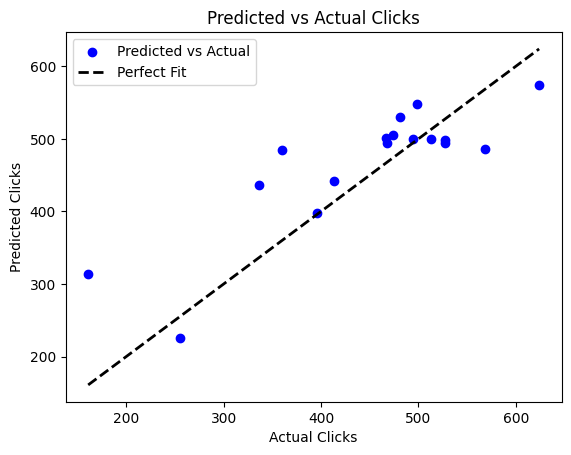

In [14]:
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = best_svr.predict(X_test)

# Calculate and print metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean absolute Error: {mae}")
print(f"R^2 Score: {r2}")

# Plot predicted vs actual values
plt.figure()
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')
plt.xlabel('Actual Clicks')
plt.ylabel('Predicted Clicks')
plt.title('Predicted vs Actual Clicks')
plt.legend(loc='best')
plt.show()



Neural Network

In [15]:
# Upgrade Numpy
!pip install --upgrade numpy

# Upgrade TensorFlow
!pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 60.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
astropy 5.3.4 requires numpy<2,>=1.21, but you have numpy 2.0.0 which is incompatible.
cudf-cu12 24.4.1 requires numpy<2.0a0,>=1.23, but you have numpy 2.0.0 which is incompatible.
cupy-cuda12x 12.2.0 requires numpy<1.27,>=1.20, but you have numpy 2.0.0 which is incompatible.
ibis-framework 8.0.0 requires numpy<2,>=1, but you have numpy 2.0.0 which is incompatible.
numba 0.58.1 requires numpy<1.27,>=1.22, but you have numpy 2.0.0 which is incompatible.
rmm-cu12 24.4.0 requires numpy<2.0a0,>=1.23, but you have numpy 2.0.0 which is incompatible.
scipy 1.11.4 requires numpy<1.28.0,>=1.21.6

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau


model = Sequential([
    Dense(128, input_dim=2),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    Dense(64),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),
    Dense(32),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=75, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Print model summary
model.summary()





/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │             384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,753 (42.00 KB)

 Trainable params: 10,753 (42.00 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=1000,
    batch_size=16,
    callbacks=[early_stopping, reduce_lr]
)


Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - loss: 230700.8438 - mae: 471.7339 - val_loss: 201812.2656 - val_mae: 435.1730 - learning_rate: 0.0010
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 207349.6406 - mae: 441.9794 - val_loss: 190812.5781 - val_mae: 422.4865 - learning_rate: 0.0010
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 203380.5625 - mae: 440.6981 - val_loss: 177505.9844 - val_mae: 406.6353 - learning_rate: 0.0010
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 200474.2656 - mae: 436.4500 - val_loss: 161681.1094 - val_mae: 386.9298 - learning_rate: 0.0010
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 174497.1250 - mae: 407.2755 - val_loss: 142488.7031 - val_mae: 361.5995 - learning_rate: 0.0010
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 147776.3594 - mae: 369.6602 - val_loss: 119470.2344 - val_mae: 328.6819 - learning_rate: 0.0010
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 129347.187

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8877.4756 - mae: 76.4560
Test Loss: 8877.4755859375
Test MAE: 76.45600891113281
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Test R²: 0.29178476678935716
Test MSE: 8877.475497723666
Test MAE: 76.45601698931526
Train R²: 0.1457081875851698
Train MSE: 8360.533578125413
Train MAE: 72.58917008585004


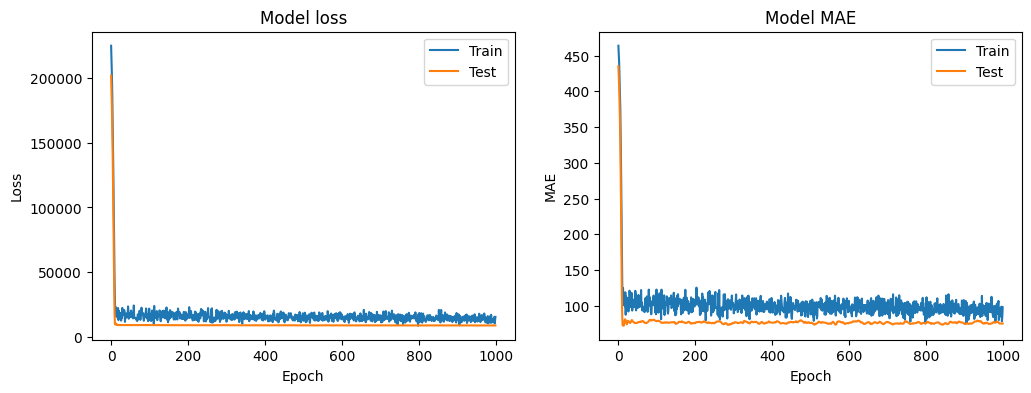

In [18]:
# Evaluate the model on the test set
loss, mae = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')
print(f'Test MAE: {mae}')

# Make predictions on the test set
y_pred_test = model.predict(X_test)
# Make predictions on the training set
y_pred_train = model.predict(X_train)

# Calculate additional metrics for test set
r2_test = r2_score(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

# Calculate additional metrics for training set
r2_train = r2_score(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

print(f'Test R²: {r2_test}')
print(f'Test MSE: {mse_test}')
print(f'Test MAE: {mae_test}')
print(f'Train R²: {r2_train}')
print(f'Train MSE: {mse_train}')
print(f'Train MAE: {mae_train}')

# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

# Plot training & validation MAE values
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model MAE')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')

plt.show()



##Ensemble model

In [19]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_r2 = r2_score(y_train, train_preds)
    train_mae = mean_absolute_error(y_train, train_preds)
    train_mse = mean_squared_error(y_train, train_preds)

    test_r2 = r2_score(y_test, test_preds)
    test_mae = mean_absolute_error(y_test, test_preds)
    test_mse = mean_squared_error(y_test, test_preds)

    print(f"Train R^2: {train_r2:.4f}, MAE: {train_mae:.4f}, MSE: {train_mse:.4f}")
    print(f"Test R^2: {test_r2:.4f}, MAE: {test_mae:.4f}, MSE: {test_mse:.4f}")

    return train_r2, train_mae, train_mse, test_r2, test_mae, test_mse

In [20]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Define the parameter grids for each model
rf_params = {
    'n_estimators': [200, 300, 500],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

svr_params = {
    'C': [10, 100, 1000],
    'gamma': [0.1, 1, 10],
    'kernel': ['rbf']
}

gbr_params = {
    'n_estimators': [200, 300, 500],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [5, 7, 9]
}

# Grid search with cross-validation for Random Forest
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid_search.fit(X_train, y_train)
best_rf = rf_grid_search.best_estimator_

# Grid search with cross-validation for SVR
svr_grid_search = GridSearchCV(SVR(), svr_params, cv=5, scoring='neg_mean_squared_error')
svr_grid_search.fit(X_train, y_train)
best_svr = svr_grid_search.best_estimator_

# Grid search with cross-validation for Gradient Boosting Regressor
gbr_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), gbr_params, cv=5, scoring='neg_mean_squared_error')
gbr_grid_search.fit(X_train, y_train)
best_gbr = gbr_grid_search.best_estimator_

# Evaluate the models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Random Forest:")
evaluate_model(best_rf, X_train, y_train, X_test, y_test)

print("\nSVR:")
evaluate_model(best_svr, X_train, y_train, X_test, y_test)

print("\nGradient Boosting Regressor:")
evaluate_model(best_gbr, X_train, y_train, X_test, y_test)


Random Forest:
Train R^2: 0.6681, MAE: 44.3922, MSE: 3248.2718
Test R^2: 0.7724, MAE: 44.3940, MSE: 2852.9024

SVR:
Train R^2: 0.5850, MAE: 44.5594, MSE: 4061.0108
Test R^2: 0.6729, MAE: 49.3932, MSE: 4099.6023

Gradient Boosting Regressor:
Train R^2: 0.6943, MAE: 41.5551, MSE: 2991.9033
Test R^2: 0.7833, MAE: 41.6583, MSE: 2716.9527


(0.6942828464964871,
 41.55508176545009,
 2991.9033404406655,
 0.7832506261426435,
 41.658263262958286,
 2716.952651304131)

Train R^2: 0.6115, MAE: 48.1880, MSE: 3802.2194
Test R^2: 0.7376, MAE: 45.6401, MSE: 3289.3922


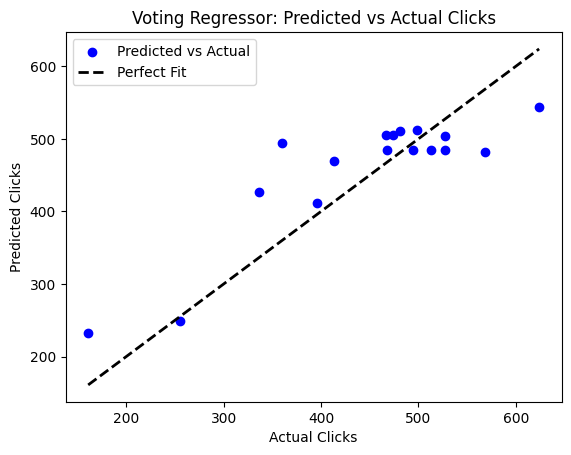

In [38]:
from sklearn.ensemble import VotingRegressor

# Initialize the models
voting_regressor = VotingRegressor(estimators=[
    ('rf', best_rf),
    ('svr', best_svr),
    ('lr', lr_model),
    ('gbr', best_gbr)
])

# Fit the voting regressor
voting_regressor.fit(X_train, y_train)

# Predict on the test set
y_pred_voting = voting_regressor.predict(X_test)

# Calculate and print metrics
evaluate_model(voting_regressor, X_train, y_train, X_test, y_test)

# Plot predicted vs actual values
plt.figure()
plt.scatter(y_test, y_pred_voting, color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')
plt.xlabel('Actual Clicks')
plt.ylabel('Predicted Clicks')
plt.title('Voting Regressor: Predicted vs Actual Clicks')
plt.legend(loc='best')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Train R^2: 0.6236, MAE: 47.4589, MSE: 3683.8624
Test R^2: 0.7968, MAE: 40.2141, MSE: 2547.1252


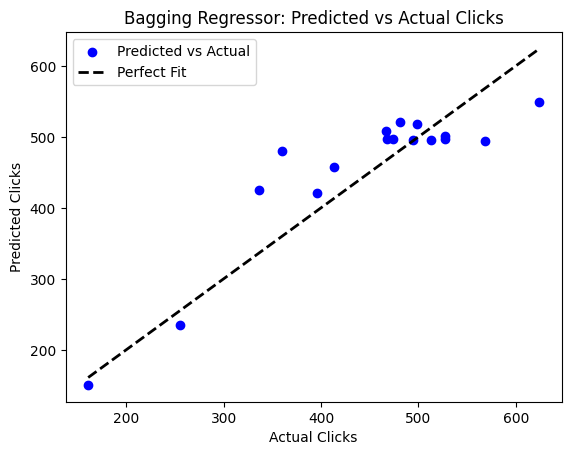

In [22]:
from sklearn.ensemble import BaggingRegressor

# Perform Grid Search for better hyperparameters
gbr_params = {
    'n_estimators': [220],
    'learning_rate': [0.0001, 0.1, 0.001],
    'max_depth': [2, 1, 3]
}

gbr_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), gbr_params, cv=5, scoring='neg_mean_squared_error')
gbr_grid_search.fit(X_train, y_train)
best_gbr = gbr_grid_search.best_estimator_

# Initialize the bagging regressor with the best performing model
bagging_regressor = BaggingRegressor(base_estimator=best_gbr, n_estimators=10, random_state=42)

# Fit the bagging regressor
bagging_regressor.fit(X_train, y_train)

evaluate_model(bagging_regressor, X_train, y_train, X_test, y_test)

# Plot predicted vs actual values
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(y_test, bagging_regressor.predict(X_test), color='blue', label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Fit')
plt.xlabel('Actual Clicks')
plt.ylabel('Predicted Clicks')
plt.title('Bagging Regressor: Predicted vs Actual Clicks')
plt.legend(loc='best')
plt.show()


In [23]:
pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.0 MB/s eta 0:00:00


In [24]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor, RandomForestRegressor, StackingRegressor

# Initialize the models
svr_model = SVR(kernel='rbf', C=1, gamma=0.1)
knn_model = KNeighborsRegressor(n_neighbors=5)
elastic_net_model = ElasticNet(alpha=1.0, l1_ratio=0.5)

# Combine models using Stacking Regressor
stacking_regressor = StackingRegressor(
    estimators=[
        ('rf', best_rf),
        ('lr', lr_model),
        ('gbr', best_gbr),
        ('svr', svr_model),
        ('knn', knn_model),
        ('elastic_net', elastic_net_model)
    ],
    final_estimator=GradientBoostingRegressor(n_estimators=200, learning_rate=0.01, random_state=42)
)

# Fit the ensemble model
stacking_regressor.fit(X_train, y_train)

# Get predictions
ensemble_train_preds = stacking_regressor.predict(X_train)
ensemble_test_preds = stacking_regressor.predict(X_test)
evaluate_model(stacking_regressor, X_train, y_train, X_test, y_test)

Train R^2: 0.3752, MAE: 59.1971, MSE: 6115.0106
Test R^2: 0.5639, MAE: 58.5085, MSE: 5465.9166


(0.37515908169195034,
 59.19706796208702,
 6115.010588401234,
 0.5639474967894189,
 58.508539552600645,
 5465.9166189124435)

## Prediction on 100 - 200 budget level

In [41]:
import numpy as np
import pandas as pd
from sklearn.ensemble import BaggingRegressor

# Define the function to make predictions and calculate statistics
def predict_and_calculate_statistics(budgets, model, X_train, y_train):
    # Prepare the input data for prediction
    months = list(range(1, 13))
    new_data = pd.DataFrame([(budget, month) for budget in budgets for month in months], columns=['Budget', 'Month'])
    X_new = new_data[['Budget', 'Month']].values

    # Train the Bagging Regressor model
    model.fit(X_train, y_train)

    # Get predictions
    ensemble_preds = model.predict(X_new)

    # Collect predictions from each base estimator
    base_preds = np.column_stack([est.predict(X_new) for est in model.estimators_])

    # Calculate mean and standard deviation of predictions
    pred_means = np.mean(base_preds, axis=1)

    # Calculate quantiles for 70% confidence intervals
    lower_quantile = 0.15  # 15th percentile for the lower bound of 70% CI
    upper_quantile = 0.85  # 85th percentile for the upper bound of 70% CI

    lower_70 = np.percentile(base_preds, lower_quantile * 100, axis=1)
    upper_70 = np.percentile(base_preds, upper_quantile * 100, axis=1)

    # Create a DataFrame to store results
    results = new_data.copy()
    results['Mean_Pred'] = pred_means
    results['Lower_70'] = lower_70
    results['Upper_70'] = upper_70

    # Calculate mean for each month and whole year
    monthly_means = results.groupby('Month')['Mean_Pred'].mean()
    yearly_mean = results['Mean_Pred'].mean()

    # Calculate conservative (lower 70%) and optimistic (upper 70%) estimations for each month and whole year
    monthly_conservative = results.groupby('Month')['Lower_70'].mean()
    monthly_optimistic = results.groupby('Month')['Upper_70'].mean()

    yearly_conservative = results['Lower_70'].mean()
    yearly_optimistic = results['Upper_70'].mean()

    # Print the results
    print("Monthly Means:")
    print(monthly_means)
    print("\nYearly Mean:")
    print(yearly_mean)

    print("\nMonthly Conservative Estimations (70% CI):")
    print(monthly_conservative)
    print("\nYearly Conservative Estimation (70% CI):")
    print(yearly_conservative)

    print("\nMonthly Optimistic Estimations (70% CI):")
    print(monthly_optimistic)
    print("\nYearly Optimistic Estimation (70% CI):")
    print(yearly_optimistic)

    return monthly_means, yearly_mean, monthly_conservative,yearly_conservative, monthly_optimistic, yearly_optimistic

# Define budgets

budgets = [50]  # Define flexible budget levels here

# Call the function with the defined budgets and model
predict_and_calculate_statistics(budgets, voting_regressor, X_train, y_train)


Monthly Means:
Month
1     259.199790
2     262.657208
3     274.230013
4     286.961222
5     292.032141
6     293.833887
7     300.988918
8     300.755005
9     296.565359
10    282.320374
11    269.489966
12    239.265378
Name: Mean_Pred, dtype: float64

Yearly Mean:
279.85827162227974

Monthly Conservative Estimations (70% CI):
Month
1     224.505512
2     222.356190
3     224.386017
4     228.305963
5     225.013201
6     225.147638
7     242.210842
8     250.457293
9     255.001286
10    243.249661
11    232.499117
12    176.790651
Name: Lower_70, dtype: float64

Yearly Conservative Estimation (70% CI):
229.1602808764776

Monthly Optimistic Estimations (70% CI):
Month
1     297.361581
2     305.104874
3     323.682286
4     347.831648
5     363.491927
6     367.884324
7     363.658109
8     353.694885
9     339.478580
10    322.932308
11    308.295400
12    300.800396
Name: Upper_70, dtype: float64

Yearly Optimistic Estimation (70% CI):
332.85135980470955


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid fea

(Month
 1     259.199790
 2     262.657208
 3     274.230013
 4     286.961222
 5     292.032141
 6     293.833887
 7     300.988918
 8     300.755005
 9     296.565359
 10    282.320374
 11    269.489966
 12    239.265378
 Name: Mean_Pred, dtype: float64,
 279.85827162227974,
 Month
 1     224.505512
 2     222.356190
 3     224.386017
 4     228.305963
 5     225.013201
 6     225.147638
 7     242.210842
 8     250.457293
 9     255.001286
 10    243.249661
 11    232.499117
 12    176.790651
 Name: Lower_70, dtype: float64,
 229.1602808764776,
 Month
 1     297.361581
 2     305.104874
 3     323.682286
 4     347.831648
 5     363.491927
 6     367.884324
 7     363.658109
 8     353.694885
 9     339.478580
 10    322.932308
 11    308.295400
 12    300.800396
 Name: Upper_70, dtype: float64,
 332.85135980470955)

In [39]:

budgets = [100]  # Define flexible budget levels here

# Call the function with the defined budgets and model
predict_and_calculate_statistics(budgets, voting_regressor, X_train, y_train)

Monthly Means:
Month
1     634.365065
2     633.291764
3     632.889471
4     620.051438
5     615.481583
6     615.846828
7     630.580162
8     636.954509
9     644.509304
10    623.070385
11    609.222232
12    560.123788
Name: Mean_Pred, dtype: float64

Yearly Mean:
621.365544184511

Monthly Conservative Estimations (70% CI):
Month
1     427.328537
2     425.380046
3     425.380046
4     425.380046
5     422.250382
6     422.250382
7     438.466923
8     446.544571
9     451.260382
10    440.243477
11    430.133866
12    357.625936
Name: Lower_70, dtype: float64

Yearly Conservative Estimation (70% CI):
426.02038282752164

Monthly Optimistic Estimations (70% CI):
Month
1     873.466492
2     872.890172
3     871.573178
4     847.871850
5     842.182908
6     842.247480
7     851.958072
8     854.761381
9     863.051334
10    834.885317
11    819.475384
12    796.868983
Name: Upper_70, dtype: float64

Yearly Optimistic Estimation (70% CI):
847.6027124733174


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid fea

(Month
 1     634.365065
 2     633.291764
 3     632.889471
 4     620.051438
 5     615.481583
 6     615.846828
 7     630.580162
 8     636.954509
 9     644.509304
 10    623.070385
 11    609.222232
 12    560.123788
 Name: Mean_Pred, dtype: float64,
 621.365544184511,
 Month
 1     427.328537
 2     425.380046
 3     425.380046
 4     425.380046
 5     422.250382
 6     422.250382
 7     438.466923
 8     446.544571
 9     451.260382
 10    440.243477
 11    430.133866
 12    357.625936
 Name: Lower_70, dtype: float64,
 426.02038282752164,
 Month
 1     873.466492
 2     872.890172
 3     871.573178
 4     847.871850
 5     842.182908
 6     842.247480
 7     851.958072
 8     854.761381
 9     863.051334
 10    834.885317
 11    819.475384
 12    796.868983
 Name: Upper_70, dtype: float64,
 847.6027124733174)

In [40]:

budgets = [150]  # Define flexible budget levels here

# Call the function with the defined budgets and model
predict_and_calculate_statistics(budgets, voting_regressor, X_train, y_train)

Monthly Means:
Month
1     843.673625
2     842.600324
3     842.198031
4     829.359998
5     824.790143
6     825.155388
7     839.888721
8     846.263069
9     853.817864
10    832.378945
11    818.530792
12    769.432348
Name: Mean_Pred, dtype: float64

Yearly Mean:
830.6741038689864

Monthly Conservative Estimations (70% CI):
Month
1     427.328537
2     425.380046
3     425.380046
4     425.380046
5     422.250382
6     422.250382
7     438.466923
8     446.544571
9     451.260382
10    440.243477
11    430.133866
12    357.625936
Name: Lower_70, dtype: float64

Yearly Conservative Estimation (70% CI):
426.02038282752164

Monthly Optimistic Estimations (70% CI):
Month
1     1333.945323
2     1333.369003
3     1332.052009
4     1308.350681
5     1302.661739
6     1302.726312
7     1312.436903
8     1315.240213
9     1323.530165
10    1295.364148
11    1279.954216
12    1257.347814
Name: Upper_70, dtype: float64

Yearly Optimistic Estimation (70% CI):
1308.081543779163


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid fea

(Month
 1     843.673625
 2     842.600324
 3     842.198031
 4     829.359998
 5     824.790143
 6     825.155388
 7     839.888721
 8     846.263069
 9     853.817864
 10    832.378945
 11    818.530792
 12    769.432348
 Name: Mean_Pred, dtype: float64,
 830.6741038689864,
 Month
 1     427.328537
 2     425.380046
 3     425.380046
 4     425.380046
 5     422.250382
 6     422.250382
 7     438.466923
 8     446.544571
 9     451.260382
 10    440.243477
 11    430.133866
 12    357.625936
 Name: Lower_70, dtype: float64,
 426.02038282752164,
 Month
 1     1333.945323
 2     1333.369003
 3     1332.052009
 4     1308.350681
 5     1302.661739
 6     1302.726312
 7     1312.436903
 8     1315.240213
 9     1323.530165
 10    1295.364148
 11    1279.954216
 12    1257.347814
 Name: Upper_70, dtype: float64,
 1308.081543779163)

In [42]:

budgets = [200]  # Define flexible budget levels here

# Call the function with the defined budgets and model
predict_and_calculate_statistics(budgets, voting_regressor, X_train, y_train)

Monthly Means:
Month
1     1052.982185
2     1051.908883
3     1051.506591
4     1038.668557
5     1034.098703
6     1034.463947
7     1049.197281
8     1055.571628
9     1063.126423
10    1041.687504
11    1027.839351
12     978.740908
Name: Mean_Pred, dtype: float64

Yearly Mean:
1039.9826635534619

Monthly Conservative Estimations (70% CI):
Month
1     427.328537
2     425.380046
3     425.380046
4     425.380046
5     422.250382
6     422.250382
7     438.466923
8     446.544571
9     451.260382
10    440.243477
11    430.133866
12    357.625936
Name: Lower_70, dtype: float64

Yearly Conservative Estimation (70% CI):
426.02038282752164

Monthly Optimistic Estimations (70% CI):
Month
1     1794.424155
2     1793.847835
3     1792.530840
4     1768.829512
5     1763.140570
6     1763.205143
7     1772.915734
8     1775.719044
9     1784.008996
10    1755.842979
11    1740.433047
12    1717.826645
Name: Upper_70, dtype: float64

Yearly Optimistic Estimation (70% CI):
1768.560375085008

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid fea

(Month
 1     1052.982185
 2     1051.908883
 3     1051.506591
 4     1038.668557
 5     1034.098703
 6     1034.463947
 7     1049.197281
 8     1055.571628
 9     1063.126423
 10    1041.687504
 11    1027.839351
 12     978.740908
 Name: Mean_Pred, dtype: float64,
 1039.9826635534619,
 Month
 1     427.328537
 2     425.380046
 3     425.380046
 4     425.380046
 5     422.250382
 6     422.250382
 7     438.466923
 8     446.544571
 9     451.260382
 10    440.243477
 11    430.133866
 12    357.625936
 Name: Lower_70, dtype: float64,
 426.02038282752164,
 Month
 1     1794.424155
 2     1793.847835
 3     1792.530840
 4     1768.829512
 5     1763.140570
 6     1763.205143
 7     1772.915734
 8     1775.719044
 9     1784.008996
 10    1755.842979
 11    1740.433047
 12    1717.826645
 Name: Upper_70, dtype: float64,
 1768.5603750850087)

In [43]:
import pandas as pd

# Prepare DataFrames for each budget level
budgets = [50, 75, 100, 125, 150, 175, 200]

# Dictionary to store DataFrames for each budget
dfs = {}

for budget in budgets:
    # Assuming the predict_and_calculate_statistics function returns monthly means and yearly values
    monthly_means, yearly_mean, lower_70, yearly_lower_70, upper_70, yearly_upper_70 = predict_and_calculate_statistics([budget], voting_regressor, X_train, y_train)

    # Creating a DataFrame for the budget level
    df = pd.DataFrame({
        'Budget(Pounds/day)': [budget],
        'Mean_Pred': [yearly_mean],
        'Lower_70': [yearly_lower_70],
        'Upper_70': [yearly_upper_70]
    })

    dfs[f'Budget_{budget}'] = df

# Concatenate all DataFrames into one
final_df = pd.concat(dfs.values(), ignore_index=True)

# Save to Excel file
final_df.to_excel('Predicted_Clicks_Stacking_Regressor.xlsx', index=False)

print("Excel file created successfully.")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid fea

Monthly Means:
Month
1     259.199790
2     262.657208
3     274.230013
4     286.961222
5     292.032141
6     293.833887
7     300.988918
8     300.755005
9     296.565359
10    282.320374
11    269.489966
12    239.265378
Name: Mean_Pred, dtype: float64

Yearly Mean:
279.85827162227974

Monthly Conservative Estimations (70% CI):
Month
1     224.505512
2     222.356190
3     224.386017
4     228.305963
5     225.013201
6     225.147638
7     242.210842
8     250.457293
9     255.001286
10    243.249661
11    232.499117
12    176.790651
Name: Lower_70, dtype: float64

Yearly Conservative Estimation (70% CI):
229.1602808764776

Monthly Optimistic Estimations (70% CI):
Month
1     297.361581
2     305.104874
3     323.682286
4     347.831648
5     363.491927
6     367.884324
7     363.658109
8     353.694885
9     339.478580
10    322.932308
11    308.295400
12    300.800396
Name: Upper_70, dtype: float64

Yearly Optimistic Estimation (70% CI):
332.85135980470955


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid fea

Monthly Means:
Month
1     529.710786
2     528.637487
3     528.235205
4     515.397206
5     510.827440
6     511.192861
7     525.926455
8     532.301054
9     539.855924
10    518.416789
11    504.568198
12    455.469319
Name: Mean_Pred, dtype: float64

Yearly Mean:
516.711560328428

Monthly Conservative Estimations (70% CI):
Month
1     427.328538
2     425.380053
3     425.380076
4     425.380151
5     422.250681
6     422.251070
7     438.468185
8     446.546385
9     451.262361
10    440.244982
11    430.134406
12    357.625936
Name: Lower_70, dtype: float64

Yearly Conservative Estimation (70% CI):
426.0210687181018

Monthly Optimistic Estimations (70% CI):
Month
1     643.227076
2     642.650757
3     641.333762
4     617.632434
5     611.943492
6     612.008065
7     621.718656
8     624.521966
9     632.811918
10    604.645901
11    589.235969
12    566.629226
Name: Upper_70, dtype: float64

Yearly Optimistic Estimation (70% CI):
617.3632684122714


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid fea

Monthly Means:
Month
1     634.365065
2     633.291764
3     632.889471
4     620.051438
5     615.481583
6     615.846828
7     630.580162
8     636.954509
9     644.509304
10    623.070385
11    609.222232
12    560.123788
Name: Mean_Pred, dtype: float64

Yearly Mean:
621.365544184511

Monthly Conservative Estimations (70% CI):
Month
1     427.328537
2     425.380046
3     425.380046
4     425.380046
5     422.250382
6     422.250382
7     438.466923
8     446.544571
9     451.260382
10    440.243477
11    430.133866
12    357.625936
Name: Lower_70, dtype: float64

Yearly Conservative Estimation (70% CI):
426.02038282752164

Monthly Optimistic Estimations (70% CI):
Month
1     873.466492
2     872.890172
3     871.573178
4     847.871850
5     842.182908
6     842.247480
7     851.958072
8     854.761381
9     863.051334
10    834.885317
11    819.475384
12    796.868983
Name: Upper_70, dtype: float64

Yearly Optimistic Estimation (70% CI):
847.6027124733174


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid fea

Monthly Means:
Month
1     739.019345
2     737.946044
3     737.543751
4     724.705718
5     720.135863
6     720.501108
7     735.234442
8     741.608789
9     749.163584
10    727.724665
11    713.876512
12    664.778068
Name: Mean_Pred, dtype: float64

Yearly Mean:
726.0198240267488

Monthly Conservative Estimations (70% CI):
Month
1     427.328537
2     425.380046
3     425.380046
4     425.380046
5     422.250382
6     422.250382
7     438.466923
8     446.544571
9     451.260382
10    440.243477
11    430.133866
12    357.625936
Name: Lower_70, dtype: float64

Yearly Conservative Estimation (70% CI):
426.02038282752164

Monthly Optimistic Estimations (70% CI):
Month
1     1103.705908
2     1103.129588
3     1101.812593
4     1078.111265
5     1072.422324
6     1072.486896
7     1082.197487
8     1085.000797
9     1093.290749
10    1065.124732
11    1049.714800
12    1027.108398
Name: Upper_70, dtype: float64

Yearly Optimistic Estimation (70% CI):
1077.8421281262404


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid fea

Monthly Means:
Month
1     843.673625
2     842.600324
3     842.198031
4     829.359998
5     824.790143
6     825.155388
7     839.888721
8     846.263069
9     853.817864
10    832.378945
11    818.530792
12    769.432348
Name: Mean_Pred, dtype: float64

Yearly Mean:
830.6741038689864

Monthly Conservative Estimations (70% CI):
Month
1     427.328537
2     425.380046
3     425.380046
4     425.380046
5     422.250382
6     422.250382
7     438.466923
8     446.544571
9     451.260382
10    440.243477
11    430.133866
12    357.625936
Name: Lower_70, dtype: float64

Yearly Conservative Estimation (70% CI):
426.02038282752164

Monthly Optimistic Estimations (70% CI):
Month
1     1333.945323
2     1333.369003
3     1332.052009
4     1308.350681
5     1302.661739
6     1302.726312
7     1312.436903
8     1315.240213
9     1323.530165
10    1295.364148
11    1279.954216
12    1257.347814
Name: Upper_70, dtype: float64

Yearly Optimistic Estimation (70% CI):
1308.081543779163


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid fea

Monthly Means:
Month
1     948.327905
2     947.254603
3     946.852311
4     934.014277
5     929.444423
6     929.809668
7     944.543001
8     950.917349
9     958.472144
10    937.033225
11    923.185072
12    874.086628
Name: Mean_Pred, dtype: float64

Yearly Mean:
935.3283837112241

Monthly Conservative Estimations (70% CI):
Month
1     427.328537
2     425.380046
3     425.380046
4     425.380046
5     422.250382
6     422.250382
7     438.466923
8     446.544571
9     451.260382
10    440.243477
11    430.133866
12    357.625936
Name: Lower_70, dtype: float64

Yearly Conservative Estimation (70% CI):
426.02038282752164

Monthly Optimistic Estimations (70% CI):
Month
1     1564.184739
2     1563.608419
3     1562.291425
4     1538.590097
5     1532.901155
6     1532.965727
7     1542.676319
8     1545.479628
9     1553.769580
10    1525.603564
11    1510.193631
12    1487.587229
Name: Upper_70, dtype: float64

Yearly Optimistic Estimation (70% CI):
1538.3209594320858
Monthly Mea

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid fea